In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

result = pd.read_csv('data/vac_inferred_lvm_v4.csv')

In [2]:
feat = pd.read_csv('data/census_cbg_with_predicted_hesitancy_vaccincation.csv')

In [3]:
list(feat.head())

['census_block_group',
 'total_households',
 'M',
 'F',
 'age0',
 'age1',
 'age2',
 'age3',
 'age4',
 'age5',
 'age6',
 'age7',
 'age8',
 'M0',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'F0',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'race_white',
 'race_black',
 'race_indian',
 'race_asian',
 'race_pacific',
 'income_0',
 'income_1',
 'income_2',
 'income_3',
 'income_4',
 'income_5',
 'income_6',
 'income_7',
 'income_8',
 'income_9',
 'income_10',
 'income_11',
 'income_12',
 'income_13',
 'income_14',
 'income_15',
 'M_Ed0',
 'M_Ed1',
 'M_Ed2',
 'M_Ed3',
 'M_Ed4',
 'M_Ed5',
 'M_Ed6',
 'M_Ed7',
 'M_Ed8',
 'M_Ed9',
 'M_Ed10',
 'M_Ed11',
 'M_Ed12',
 'M_Ed13',
 'M_Ed14',
 'M_Ed15',
 'F_Ed0',
 'F_Ed1',
 'F_Ed2',
 'F_Ed3',
 'F_Ed4',
 'F_Ed5',
 'F_Ed6',
 'F_Ed7',
 'F_Ed8',
 'F_Ed9',
 'F_Ed10',
 'F_Ed11',
 'F_Ed12',
 'F_Ed13',
 'F_Ed14',
 'F_Ed15',
 'Ed0',
 'Ed1',
 'Ed2',
 'Ed3',
 'Ed4',
 'Ed5',
 'Ed6',
 'Ed7',
 'Ed8',
 'Ed9',
 'Ed10',
 'Ed11',
 'Ed12',
 'Ed13

In [4]:
eds = feat[['Ed%d' % i for i in range(16)]]
age = feat[['age%d' % i for i in range(8)]]

In [5]:
age_avg = (age.to_numpy() * np.arange(8).reshape(1, 8)).sum(axis=1)

In [6]:
# age_avg = age.to_numpy()[:, 4:].sum(axis=1)

In [7]:
ed_avg = eds.to_numpy()[:, 12:].sum(axis=1)

In [8]:
feat['age_avg'] = age_avg
feat['ed_avg'] = ed_avg

In [9]:
result.head()

,Unnamed: 0,census_block_group,vac_rate_inferred_0,vac_rate_inferred_1,vac_rate_inferred_2,vac_rate_inferred_3,vac_rate_inferred_4,vac_rate_inferred_5,vac_rate_inferred_6,vac_rate_inferred_7,vac_rate_inferred_8,vac_rate_inferred_9,vac_rate_inferred
0,69480,180699613001,45.490530,47.213020,50.813680,51.162510,53.922630,50.427570,55.850980,54.010296,47.363050,51.838802,49.721626
1,69481,180699613002,42.502080,46.687890,46.631160,44.399680,48.984090,39.405270,40.766530,46.059840,45.371200,40.157350,45.010796
2,69482,180699613003,58.272846,68.661340,55.924885,53.549778,60.843067,57.047610,50.926730,63.464700,66.477480,59.296290,58.687397
3,69483,180699614001,47.221237,47.483067,47.339520,50.005703,51.351906,49.566574,53.133884,52.142460,55.142975,54.075024,49.911650
4,69484,180699614002,53.329834,60.222540,53.051647,50.928745,53.298010,50.416810,55.231068,53.683010,53.062290,50.439220,55.201470


In [10]:
# Plot the results

from shapely.geometry import Polygon
import json
reader = json.load(open('data/cbg.geojson'))
dicts = []

for i in range(len(reader['features'])):
    item = {
        'census_block_group': int(reader['features'][i]['properties']['CensusBlockGroup']),
        'poly': Polygon(reader['features'][i]['geometry']['coordinates'][0][0])
    }
    dicts.append(item)

In [11]:
result = result.merge(pd.DataFrame.from_dict(dicts), on='census_block_group')

In [12]:
result = result.merge(feat, on='census_block_group', how='left')

In [13]:
cities = pd.read_csv('data/uscities.csv')
cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import us

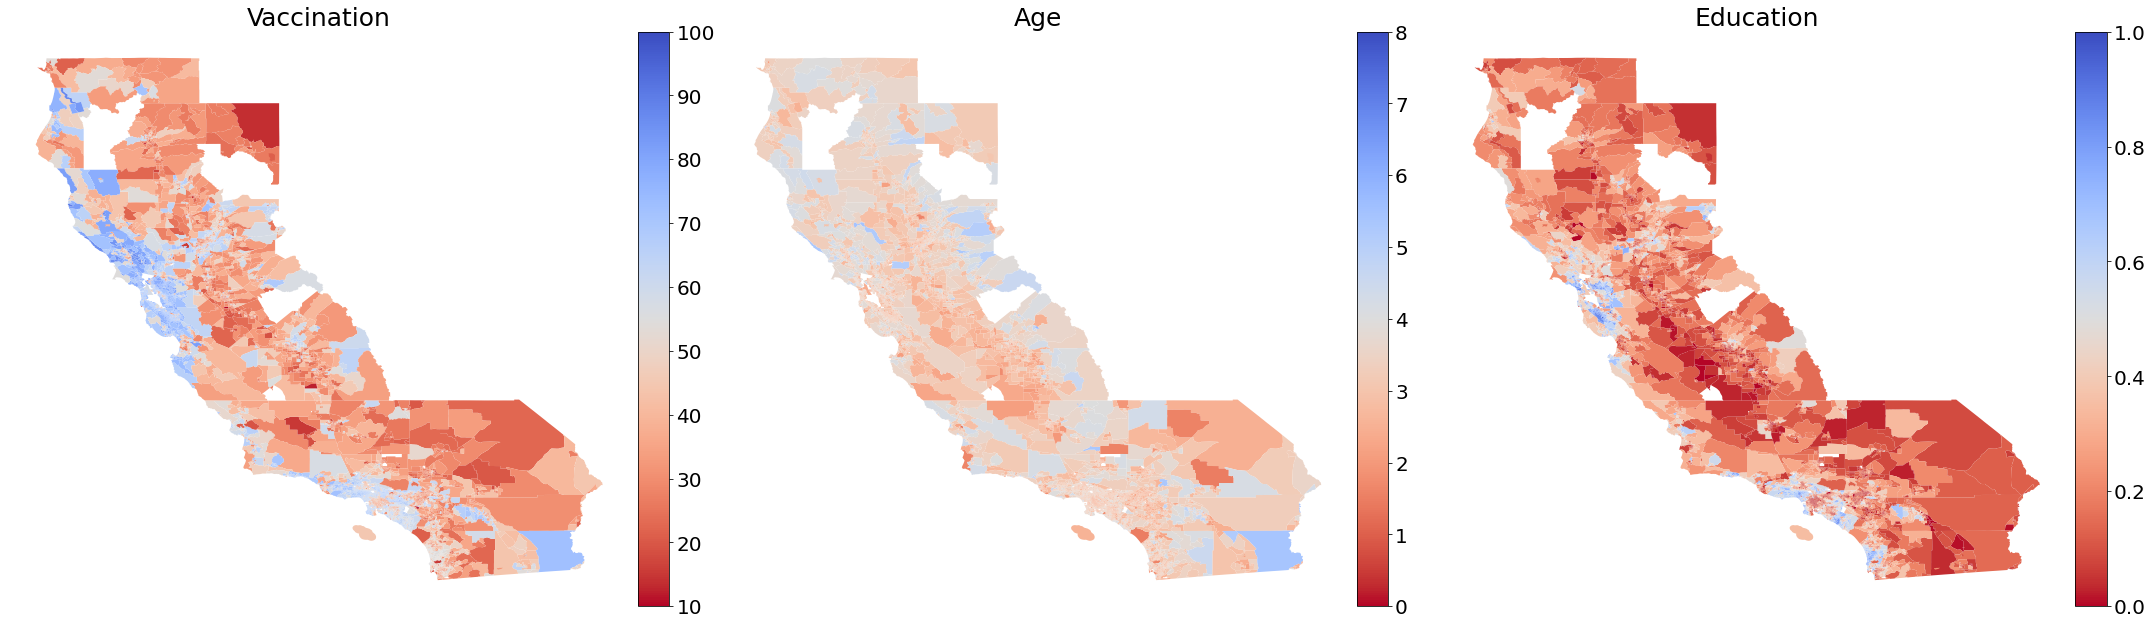

In [15]:
state_id = 6
fontsize = 25

state_name = us.states.lookup('%.2d' % state_id)
# if state_name is not None:
#     state_name = state_name.abbr
# else:
#     continue

# Select the biggest cities
state_city = cities[cities['state_id'] == state_name].sort_values('population', ascending=False).reset_index()

gdf = gpd.GeoDataFrame(result, geometry='poly')
gdf = gdf[gdf['census_block_group']//10000000000 == state_id]
# gdf = gdf[gdf['census_block_group']//1000000000 == 60]
# gdf = gdf[gdf['interpolated_hesitant'] > 0 ]

# gdf.plot(column='Estimated hesitant or unsure', legend=True, figsize=(15, 15), 
#          vmin=0.05, vmax=0.30, 
#          cmap='OrRd')
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax.set_title('Vaccination', fontsize=fontsize)
ax.axis('off')
gdf.plot(column='vac_rate_inferred', legend=True, ax=ax, cax=cax,
         vmin=10, vmax=100, 
         cmap='coolwarm_r')
cax.tick_params(labelsize=20)

for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break

plt.subplot(1, 3, 2)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_title('Age', fontsize=fontsize)
ax.axis('off')
gdf.plot(column='age_avg', ax=ax, cax=cax, legend=True,
         vmin=0, vmax=8, 
         cmap='coolwarm_r')
cax.tick_params(labelsize=20)

for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break
        

plt.subplot(1, 3, 3)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax.set_title('Education', fontsize=fontsize)
ax.axis('off')
gdf.plot(column='ed_avg', ax=ax, cax=cax, legend=True,
         vmin=0, vmax=1, 
         cmap='coolwarm_r')
cax.tick_params(labelsize=20)

for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break
        
# plt.savefig('/data/social/agg/FL/FL.png')
plt.tight_layout()
plt.savefig('plot/state/%s.png' % state_name, dpi=300)
plt.show()

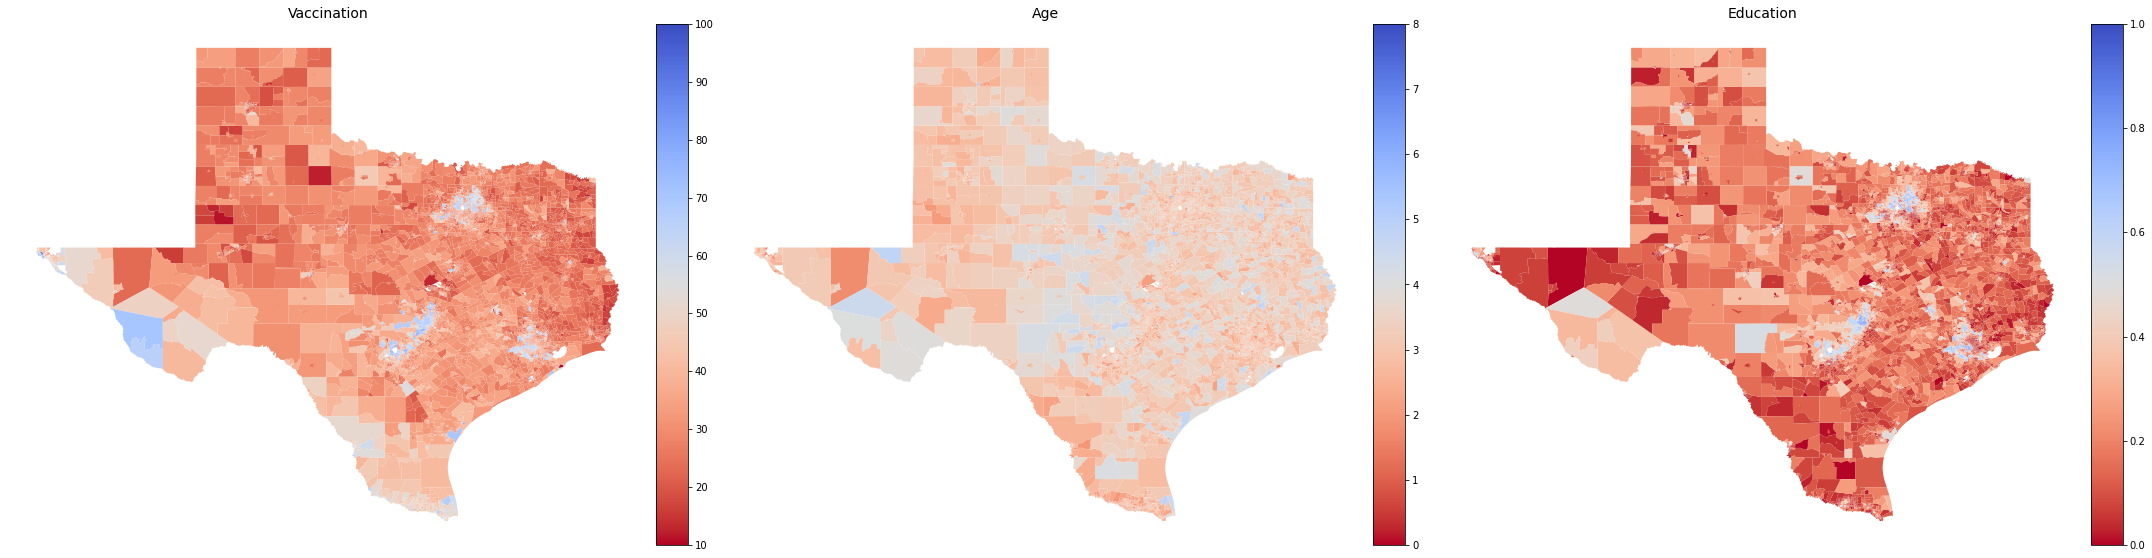

In [16]:
state_id = 48

state_name = us.states.lookup('%.2d' % state_id)
# if state_name is not None:
#     state_name = state_name.abbr
# else:
#     continue

# Select the biggest cities
state_city = cities[cities['state_id'] == state_name].sort_values('population', ascending=False).reset_index()

gdf = gpd.GeoDataFrame(result, geometry='poly')
gdf = gdf[gdf['census_block_group']//10000000000 == state_id]
# gdf = gdf[gdf['census_block_group']//1000000000 == 60]
# gdf = gdf[gdf['interpolated_hesitant'] > 0 ]

# gdf.plot(column='Estimated hesitant or unsure', legend=True, figsize=(15, 15), 
#          vmin=0.05, vmax=0.30, 
#          cmap='OrRd')
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax.set_title('Vaccination', fontsize=14)
ax.axis('off')
gdf.plot(column='vac_rate_inferred', legend=True, ax=ax, cax=cax,
         vmin=10, vmax=100, 
         cmap='coolwarm_r')

for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break

plt.subplot(1, 3, 2)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax.set_title('Age', fontsize=14)
ax.axis('off')
gdf.plot(column='age_avg', ax=ax, cax=cax, legend=True,
         vmin=0, vmax=8, 
         cmap='coolwarm_r')


for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break
        

plt.subplot(1, 3, 3)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax.set_title('Education', fontsize=14)
ax.axis('off')
gdf.plot(column='ed_avg', ax=ax, cax=cax, legend=True,
         vmin=0, vmax=1, 
         cmap='coolwarm_r')


for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break
        
# plt.savefig('/data/social/agg/FL/FL.png')
plt.tight_layout()
plt.savefig('plot/state/%s.png' % state_name)
plt.show()

In [94]:
gdf = gpd.GeoDataFrame(result, geometry='poly')
gdf = gdf[gdf['census_block_group']//10000000000 == 48]

campaign_target_cbg = pd.read_csv('../data/covid/campaign/campaign_target_cbg.txt')
campaign_target_cbg.columns = ['census_block_group', 'total_population', 'longitude', 'latitude', 'lift', 'centraltiy']

gdf = gdf.merge(campaign_target_cbg, on='census_block_group', how='left') 

In [95]:
len(set(campaign_target_cbg['census_block_group']) & set(gdf['census_block_group']))

15710

In [96]:
gdf['centrality'] = np.log(1 + gdf['centraltiy'])


<AxesSubplot:>

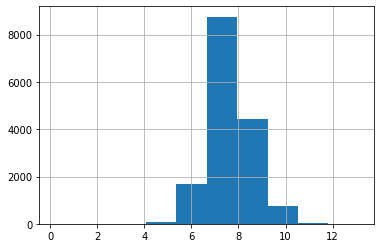

In [97]:
gdf['centrality'].hist()

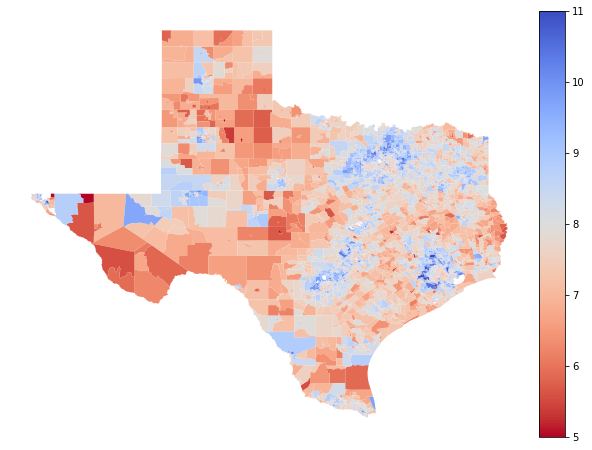

In [100]:
state_id = 48

state_name = us.states.lookup('%.2d' % state_id)
# if state_name is not None:
#     state_name = state_name.abbr
# else:
#     continue

# Select the biggest cities
state_city = cities[cities['state_id'] == state_name].sort_values('population', ascending=False).reset_index()


# gdf = gdf[gdf['census_block_group']//1000000000 == 60]
# gdf = gdf[gdf['interpolated_hesitant'] > 0 ]

# gdf.plot(column='Estimated hesitant or unsure', legend=True, figsize=(15, 15), 
#          vmin=0.05, vmax=0.30, 
#          cmap='OrRd')
plt.figure(figsize=(10, 10))

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# ax.set_title('Vaccination', fontsize=14)
ax.axis('off')
gdf.plot(column='centrality', legend=True, ax=ax, cax=cax,
         vmin=5, vmax=11,
         cmap='coolwarm_r')

for idx, dat in state_city.iterrows():
    plt.gca().scatter(dat.lng, dat.lat, s=10, color='blue', alpha=0.5)
    plt.gca().annotate(dat.city, (dat.lng, dat.lat))
    if idx == 10:
        break
plt.savefig('centrality_%s.png' % state_name, dpi=300)